e) haga una lista de clientes ordenada por cantidad de compras

##ORDENAMIENTO:

con la grafica del item b en el cual consistia en la cantidad comprada por cada cliente, podemos ordenar la grafica y a la vez crear la lista de los clientes que mas compran hasta los que menos compran, pues a la empresa le interesan sus grandes compradores.

##GRAFICA:

para ordenar la grafica segun la mayor compra de sus clientes hacia la menor se usa el metodo sort() de las cantidades totales compradas por cada cliente y asi ubicarlas respectivamente en el eje "x" y el eje "y":

##LISTA:

para la lista se uso el metodo tolist() para convertir los valores unicos de ID_Cliente y Cantidad y asi poder asociar cada cliente con la sumatoria total de todos las cantidades de todos sus productos en un orden ascendente a beneficio de la empresa que desea conocer los datos.


Clientes ordenados de mayor a menor cantidad:
Cliente 31, Cantidad de Compras: 290715
Cliente 6, Cantidad de Compras: 286949
Cliente 26, Cantidad de Compras: 285458
Cliente 11, Cantidad de Compras: 285170
Cliente 29, Cantidad de Compras: 282369
Cliente 28, Cantidad de Compras: 282172
Cliente 18, Cantidad de Compras: 280567
Cliente 15, Cantidad de Compras: 278658
Cliente 19, Cantidad de Compras: 278038
Cliente 24, Cantidad de Compras: 277726
Cliente 32, Cantidad de Compras: 276930
Cliente 38, Cantidad de Compras: 276742
Cliente 39, Cantidad de Compras: 276138
Cliente 12, Cantidad de Compras: 275633
Cliente 35, Cantidad de Compras: 273961
Cliente 0, Cantidad de Compras: 273706
Cliente 3, Cantidad de Compras: 273206
Cliente 2, Cantidad de Compras: 272257
Cliente 5, Cantidad de Compras: 272185
Cliente 9, Cantidad de Compras: 271590
Cliente 20, Cantidad de Compras: 269990
Cliente 10, Cantidad de Compras: 268004
Cliente 34, Cantidad de Compras: 267709
Cliente 4, Cantidad de Compras: 267548
C

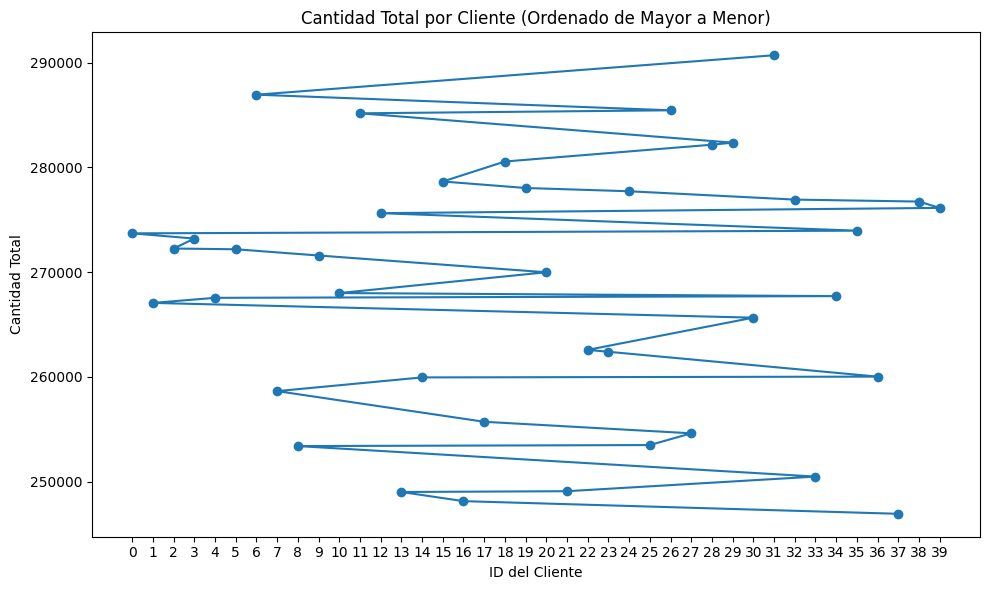

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

#Cargar los datos de los archivos CSV
clientes_df = pd.read_csv('CLIENTES.csv')
factura_df = pd.read_csv('FACTURA.csv')

#Sumar cantidades por ID_Factura en FACTURA.csv
cantidad_total_por_factura = factura_df.groupby('ID_Factura')['Cantidad'].sum().reset_index()

#Combinar las columnas en base a ID_Factura
merged_df = pd.merge(clientes_df, cantidad_total_por_factura, left_on='ID_FACTURA', right_on='ID_Factura', how='left')

#cantidad total por cliente sumando cantidades de todas las facturas
cantidad_total_por_cliente = merged_df.groupby('ID_Cliente')['Cantidad'].sum().reset_index()

#ordenar dataframe de forma descendente
cantidad_total_por_cliente = cantidad_total_por_cliente.sort_values(by='Cantidad', ascending=False)

#lista de compradores de mayor a menor
clientes_ordenados = cantidad_total_por_cliente[['ID_Cliente', 'Cantidad']].astype(int).values.tolist()
print("Clientes ordenados de mayor a menor cantidad:")
for cliente in clientes_ordenados:
    print(f"Cliente {cliente[0]}, Cantidad de Compras: {cliente[1]}")

#Gráfico de líneas mayor a menor
plt.figure(figsize=(10, 6))
plt.plot(cantidad_total_por_cliente['ID_Cliente'], cantidad_total_por_cliente['Cantidad'], marker='o', linestyle='-')
plt.xlabel('ID del Cliente')
plt.ylabel('Cantidad Total')
plt.title('Cantidad Total por Cliente (Ordenado de Mayor a Menor)')

plt.xticks(range(int(cantidad_total_por_cliente['ID_Cliente'].min()), int(cantidad_total_por_cliente['ID_Cliente'].max()) + 1, 1))

plt.tight_layout()
plt.show()

##OBSERVACIONES:

el id de cliente 31 fue el mayor comprador de la empresa con 290715 unidades compradas, mientras el id del cliente 37 fue el que menor numero que compras realizo con 246921 unidades adquiridas, la diferencia de unidades adquiridas entre una empresa u otra no es mucha en relacion a todas las unidades compradas en total, por lo cual la diferencia entre el valor maximo de compras y el minimo es de 43794 unidades.